This notebook replicates the results from https://kitchingroup.cheme.cmu.edu/blog/2019/09/13/Sensitivity-analysis-with-odeint-and-autograd using Jax, which has superseded ``autograd``.

In [1]:
import jax.numpy as jnp
from jax.experimental.ode import odeint
from jax import jacobian

import matplotlib.pyplot as plt

In [2]:
Ca0 = 1.0
k1 = k_1 = 3.0

tspan = jnp.linspace(0, 0.5)

In [3]:
def C(K):
    def dCdt(Ca, t, K):
        return -K[0] * Ca + K[1] * (Ca0 - Ca)
    sol = odeint(dCdt, Ca0, tspan, K)
    return sol

Solve the equation:

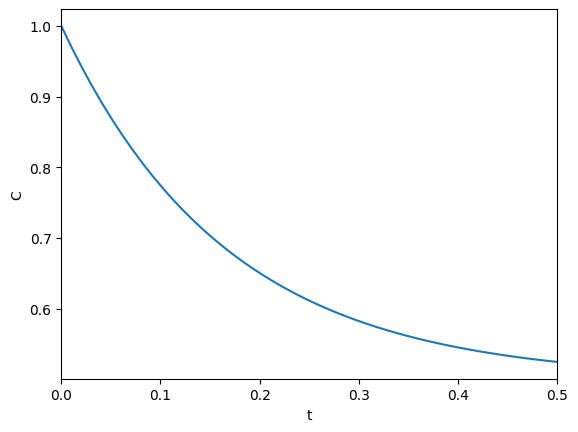

In [4]:
plt.plot(tspan, C(jnp.array([k1, k_1])))
plt.xlim([tspan.min(), tspan.max()])
plt.xlabel('t')
plt.ylabel('C');

Calculate the sensitivities:

In [5]:
dCdk = jacobian(C)

In [6]:
%%time
k_sensitivity = dCdk(jnp.array([k1, k_1]))

CPU times: user 1.33 s, sys: 71.3 ms, total: 1.4 s
Wall time: 1.39 s


Text(0, 0.5, 'sensitivity')

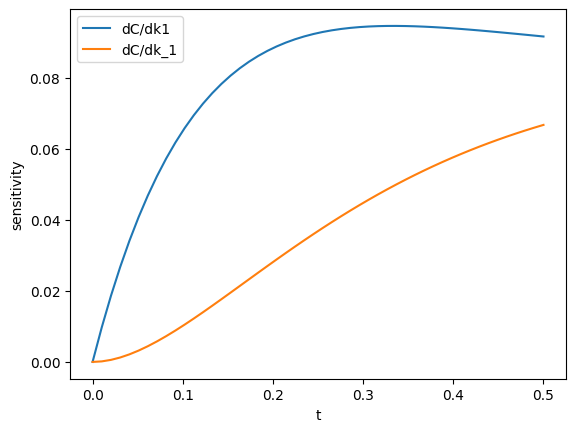

In [7]:
plt.plot(tspan, jnp.abs(k_sensitivity[:, 0]), label='dC/dk1')
plt.plot(tspan, jnp.abs(k_sensitivity[:, 1]), label='dC/dk_1')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('sensitivity')

Compare the results with those obtained from ``numdifftools``:

In [8]:
import numdifftools as nd

In [9]:
%%time
fdk1, fdk_1 = nd.Jacobian(C)([k1, k_1]).T

CPU times: user 19.6 s, sys: 2.35 s, total: 22 s
Wall time: 21.7 s


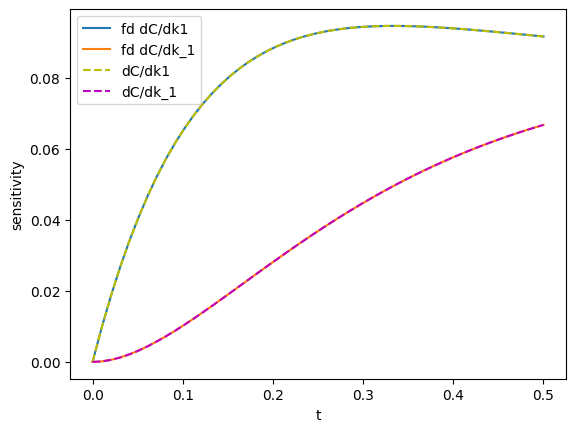

In [10]:
plt.plot(tspan, jnp.abs(fdk1), label='fd dC/dk1')
plt.plot(tspan, jnp.abs(fdk_1), label='fd dC/dk_1')
plt.plot(tspan, jnp.abs(k_sensitivity[:, 0]), 'y--', label='dC/dk1')
plt.plot(tspan, jnp.abs(k_sensitivity[:, 1]),'m--', label='dC/dk_1')
plt.legend(loc='best');
plt.xlabel('t');
plt.ylabel('sensitivity');